<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/CV_CNN/remove_Mn_SVM_jun_28_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D, axes3d
%matplotlib inline

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [25]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

Cloning into 'Machine_Learning_DataSet'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 212 (delta 4), reused 0 (delta 0), pack-reused 195
Receiving objects: 100% (212/212), 67.19 MiB | 17.54 MiB/s, done.
Resolving deltas: 100% (68/68), done.
/content/Machine_Learning_DataSet/Machine_Learning_DataSet


In [26]:
df=pd.read_excel("remove_Mn.xlsx")
print(df.head())

    tipo  D2EHPA  time  H2SO4  NaCl  EDTA    Mn
0  train    0.08     4    0.4     8    12   6.0
1  train    0.16     4    0.4     8     4  20.0
2  train    0.08     8    0.4     8     4  13.0
3  train    0.16     8    0.4     8    12   7.0
4   test    0.08     4    0.8     8     4  25.0


In [27]:
norm_df = df.drop(['tipo'],axis=1)
norm_df =(norm_df -norm_df.mean())/norm_df.std()

In [28]:
norm_df

,D2EHPA,time,H2SO4,NaCl,EDTA,Mn
0,-1.143544e+00,-1.143544,-1.143544e+00,-1.143544,1.181834,-0.421988
1,1.143544e+00,-1.143544,-1.143544e+00,-1.143544,-1.251353,1.734153
2,-1.143544e+00,1.143544,-1.143544e+00,-1.143544,-1.251353,0.656083
3,1.143544e+00,1.143544,-1.143544e+00,-1.143544,1.181834,-0.267978
4,-1.143544e+00,-1.143544,1.143544e+00,-1.143544,-1.251353,2.504204
5,1.143544e+00,-1.143544,1.143544e+00,-1.143544,1.181834,0.656083
6,-1.143544e+00,1.143544,1.143544e+00,-1.143544,1.181834,-1.346048
7,1.143544e+00,1.143544,1.143544e+00,-1.143544,-1.251353,0.348063
8,-1.143544e+00,-1.143544,-1.143544e+00,1.143544,-1.251353,-0.421988
9,1.143544e+00,-1.143544,-1.143544e+00,1.143544,1.181834,-1.346048


In [29]:
df

,tipo,D2EHPA,time,H2SO4,NaCl,EDTA,Mn
0,train,0.08,4,0.4,8,12,6.0
1,train,0.16,4,0.4,8,4,20.0
2,train,0.08,8,0.4,8,4,13.0
3,train,0.16,8,0.4,8,12,7.0
4,test,0.08,4,0.8,8,4,25.0
5,train,0.16,4,0.8,8,12,13.0
6,train,0.08,8,0.8,8,12,0.0
7,train,0.16,8,0.8,8,4,11.0
8,train,0.08,4,0.4,24,4,6.0
9,test,0.16,4,0.4,24,12,0.0


In [30]:
train = norm_df[df.tipo != 'test'] # exluding cases with zero in volume
train.shape

(31, 6)

In [31]:
test = norm_df[df.tipo == 'test'] # exluding cases with zero in volume
test.shape

(4, 6)

In [32]:
x_train = train.drop(["Mn"],axis=1)
x_test = test.drop(["Mn"],axis=1)
y_train = train['Mn']
y_test = test['Mn']

In [33]:
model =  SVR(kernel="rbf", C=1000, gamma=0.1)
# obs kernel "rbf", "linear", "polynomial"

In [34]:
# treina a rede neural
model.fit(x_train, y_train)


SVR(C=1000, gamma=0.1)

In [35]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)
print('r2_score train',r2_score(y_train,y_calc_train),'r2_score test',r2_score(y_test,y_calc_test))

r2_score train 0.9880040031335006 r2_score test -2.2118232584029696


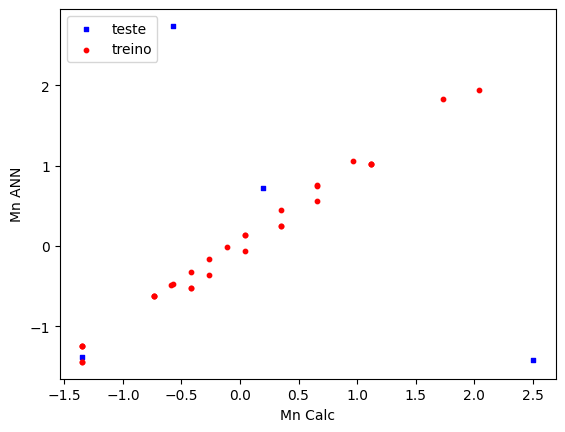

In [36]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Mn ANN')
plt.xlabel('Mn Calc')
plt.show()

In [37]:
def function(x,model= model):
  x=x.reshape((1, 5))
  df = pd.DataFrame(x)
  Y=model.predict(df)
  fun=Y*(-1)
  return fun


In [16]:
#bounds = [(-2, 2),(-2, 2),(-2, 2),(-2, 2),(-2, 2)]
bounds = [(-1.2, 1.2)]*5
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, 5))


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR 

In [17]:
print(Condicoes)

     0         1        2    3    4
0  1.2 -0.850301 -0.75975 -1.2 -1.2


In [18]:
resp_opt=model.predict(Condicoes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [19]:
Condicoes['Mn'] = resp_opt[0]


In [20]:
df = df.drop(['tipo'],axis=1)
Condicoes.columns = df.columns

In [21]:
Condicoes = Condicoes*df.std()+df.mean()

In [22]:
Condicoes

,D2EHPA,time,H2SO4,NaCl,EDTA,Mn
0,0.161975,4.512867,0.467124,7.605044,4.168843,19.801466
